<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20221002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#오늘의 목표
* customer analysis
* iterator

In [36]:
import pandas as pd
import numpy as np 
import plotnine as gg
from plotnine import ggplot, aes
import matplotlib.pyplot as plt 
import seaborn as sns 
from datetime import datetime, date, time, timezone, timedelta
import os
import re

from functools import reduce
from collections import defaultdict

# customer analysis

In [2]:
os.listdir()

['.config',
 'scanner_data.csv',
 'ecommerce-data.csv',
 '1_orders_dataset.csv',
 'KPMG_VI_New_raw_data_update_final.csv',
 'online_retail_II.xlsx',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'test.csv',
 'mall_customers.csv',
 '1_order_payments_dataset.csv',
 '1_customers_dataset.csv',
 'sample_data']

In [3]:
df = pd.read_csv('mall_customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
df.columns = [re.sub(' ', '_', re.sub(' \(.+\)$', '', a)).lower() for a in df.columns]
df.head()

,customerid,gender,age,annual_income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


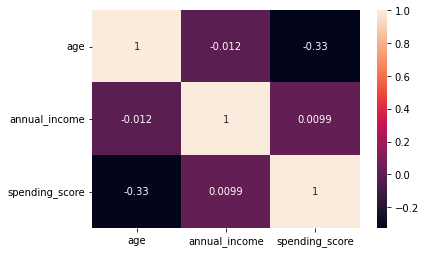

In [9]:
sns.heatmap(df.drop(['customerid', 'gender'], axis = 1).corr(), annot = True)

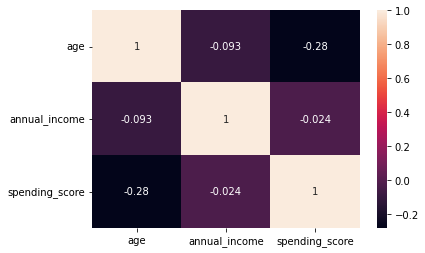

In [10]:
sns.heatmap(df[df.gender == 'Male'].drop(['customerid', 'gender'], axis = 1).corr(), annot = True)

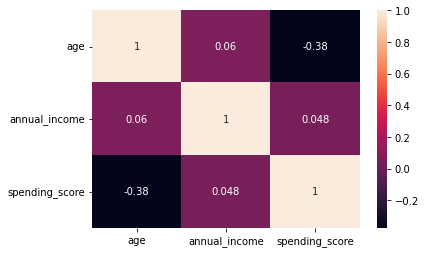

In [12]:
sns.heatmap(df[df.gender == 'Female'].drop(['customerid', 'gender'], axis = 1).corr(), annot = True)

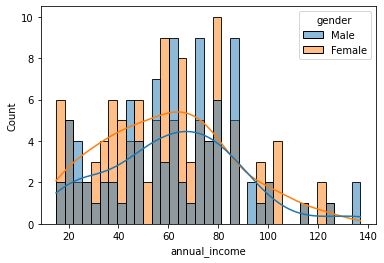

In [15]:
sns.histplot(data = df, x = 'annual_income', hue = 'gender', kde = True, bins = 35)

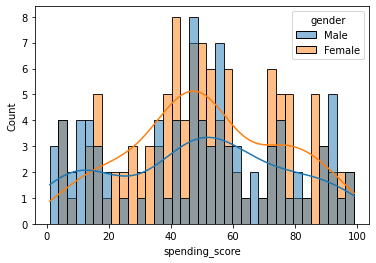

In [16]:
sns.histplot(data = df, x = 'spending_score', hue = 'gender', kde = True, bins = 35)

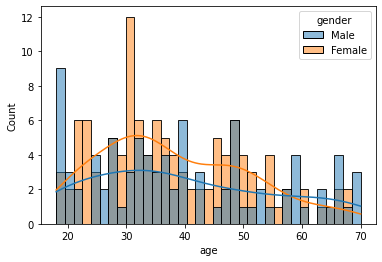

In [17]:
sns.histplot(data = df, x = 'age', hue = 'gender', kde = True, bins = 35)

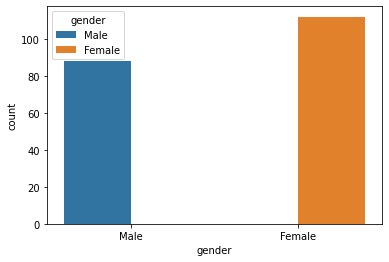

In [19]:
sns.countplot(data = df, x = 'gender', hue = 'gender')

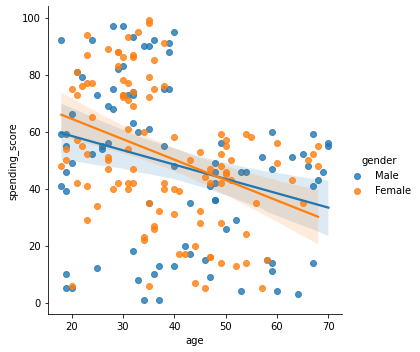

In [20]:
sns.lmplot(data = df, x = 'age', y = 'spending_score', hue = 'gender')

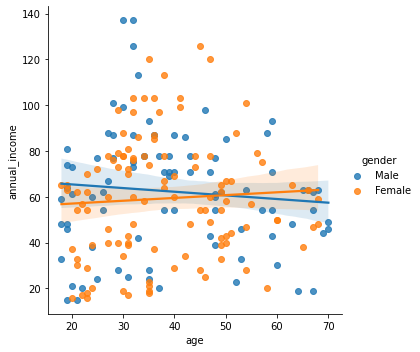

In [21]:
sns.lmplot(data = df, x = 'age', y = 'annual_income', hue = 'gender')

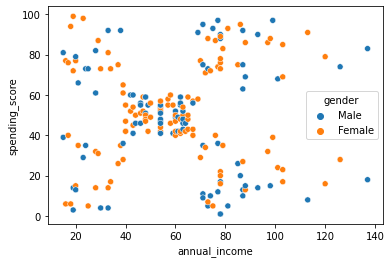

In [23]:
sns.scatterplot(data = df, x = 'annual_income', y = 'spending_score', hue = 'gender')

# iterator

In [24]:
mat = [list('ABC'), list('DEF'), list('GHI')]
a = {letter : [r, c] for r, rows in enumerate(mat) for c, letter in enumerate(rows)}
arr = np.empty([3,3], dtype = 'object')
for k, v in a.items() :
  arr[v[0], v[1]] = k
arr

array([['A', 'B', 'C'],
       ['D', 'E', 'F'],
       ['G', 'H', 'I']], dtype=object)

In [44]:
names = np.random.choice(['kim', 'park', 'lee'], 100, replace = True)
score = np.random.normal(70, 10, 100).astype(int)
rev = np.random.normal(300, 200, 100).astype(int)
b = pd.DataFrame({'name' : names, 'score' : score, 'rev' : rev})
b.head()

,name,score,rev
0,park,59,426
1,lee,79,548
2,lee,71,113
3,park,44,298
4,kim,71,203


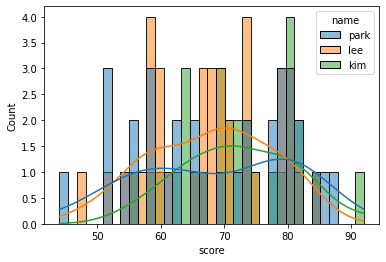

In [55]:
sns.histplot(data = b, x = 'score', hue = 'name', kde = True, bins = 35)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).


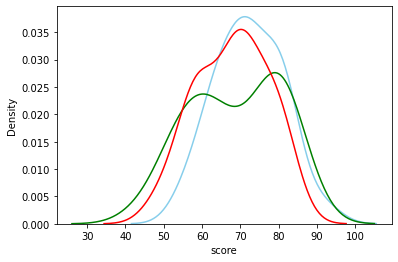

In [62]:
sns.distplot(b[b.name == 'kim']['score'], color = 'skyblue', kde = True, hist = False)
sns.distplot(b[b.name == 'park']['score'], color = 'green', kde = True, hist = False)
sns.distplot(b[b.name == 'lee']['score'], color = 'red', kde = True, hist = False)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).


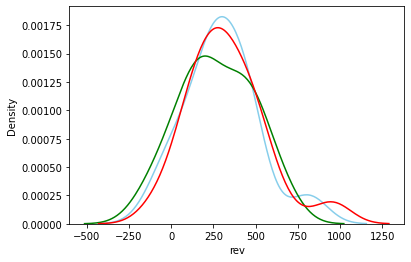

In [63]:
sns.distplot(b[b.name == 'kim']['rev'], color = 'skyblue', kde = True, hist = False)
sns.distplot(b[b.name == 'park']['rev'], color = 'green', kde = True, hist = False)
sns.distplot(b[b.name == 'lee']['rev'], color = 'red', kde = True, hist = False)

In [45]:
res_score = defaultdict(list)
res_rev = defaultdict(list)

for i in range(len(b)) :
  res_score[b['name'][i]].append(b['score'][i])
  res_rev[b['name'][i]].append(b['rev'][i])

print(res_score)
print(res_rev)

defaultdict(<class 'list'>, {'park': [59, 44, 61, 79, 73, 59, 82, 78, 80, 79, 65, 69, 78, 56, 54, 86, 74, 79, 62, 84, 52, 52, 87, 56, 67, 72, 80, 65, 59, 63, 81, 82, 51], 'lee': [79, 71, 82, 58, 60, 75, 60, 70, 61, 55, 74, 57, 54, 59, 71, 70, 79, 79, 58, 68, 80, 59, 68, 74, 73, 80, 67, 74, 67, 51, 68, 80, 67, 65, 84, 60, 48, 70], 'kim': [71, 80, 71, 64, 75, 72, 78, 58, 64, 80, 82, 92, 81, 70, 82, 73, 85, 55, 64, 81, 69, 72, 74, 65, 79, 70, 60, 66, 63]})
defaultdict(<class 'list'>, {'park': [426, 298, 569, 529, 282, 461, 80, 545, 203, 648, 213, -183, 392, 173, -81, 63, 183, 693, 153, -79, 426, 368, 155, 487, 410, 8, 499, -2, 264, 115, 88, 331, 206], 'lee': [548, 113, 516, 281, 346, 309, 102, 274, 343, 211, 89, 483, 465, 544, 85, 477, 423, 950, 278, 423, 250, 678, 188, 243, 74, 206, 364, 183, -50, 549, 92, 421, 305, -97, 957, 167, 374, 252], 'kim': [203, 177, -31, 319, 456, 219, 507, 433, 270, 259, 136, 802, 466, 280, 482, 126, 826, 42, 284, 230, 64, 441, 342, 408, 406, -19, 328, 275, -9

In [46]:
{k : np.mean(v) for k, v in res_score.items()}

{'park': 68.72727272727273, 'lee': 67.76315789473684, 'kim': 72.27586206896552}

In [47]:
{k : np.mean(v) for k, v in res_rev.items()}

{'park': 270.3939393939394, 'lee': 326.7368421052632, 'kim': 297.6551724137931}

In [48]:
{k : np.sum(v) for k, v in res_rev.items()}

{'park': 8923, 'lee': 12416, 'kim': 8632}

In [77]:
{k : np.std(v) for k, v in res_rev.items()}

{'park': 218.25991447423266,
 'lee': 227.09674314688542,
 'kim': 212.5040001022405}